<a target="_blank" href="https://colab.research.google.com/github/heechul/DeepPicar-v3/blob/devel/RunAll.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a>

In [35]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pandas import read_csv
from sklearn.model_selection import train_test_split
import math
# from skimage import data
from skimage import io
from skimage.exposure import match_histograms

In [36]:
# input image resolution to the DNN model (smaller than the original dataset image resolution: 320x240x3)
img_width = 160
img_height = 66
img_channels = 3

model_name = "model_opt"
model_file = "models/{}-{}x{}x{}".format(model_name[6:], img_width, img_height, img_channels)

In [37]:
import requests 
import os
import zipfile

dataset_dir = "dataset"
dataset_zipfile = 'labtrack-leftonly-RTCSA22.zip' # 'Dataset-kucsl-Aug2022-zero.zip' # 'labtrack-leftonly-RTCSA22.zip' # 'Dataset.zip'
RunningInCOLAB = 'google.colab' in str(get_ipython())
force_unzip = False
use_match_histogram = False

if RunningInCOLAB: 
    print("in colab")
    from google.colab import files
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))
        dataset_zipfile = fn  # expecting a zip file to be uploaded. 
else:
    print ("not in colab")
    # RPI_IP=None # replace this with the IP address of your raspberry pi 
    # if RPI_IP is not None:
    #     URL="http://"+RPI_IP+":8000/"+dataset_zipfile
    #     filename=URL.split('/')[-1]
    #     r = requests.get(URL)
    #     open(filename, 'wb').write(r.content)

# if not os.path.isfile(dataset_zipfile):
#     default_dataset_URL = "https://raw.githubusercontent.com/heechul/DeepPicar-v3/devel/Dataset-kucsl-Apr2022.zip"    
#     print ("No existing dataset. download from ", default_dataset_URL)
#     r = requests.get(default_dataset_URL)
#     open(dataset_zipfile, 'wb').write(r.content)

if not os.path.isdir(dataset_dir) or force_unzip==True:
    print ('unzip %s into %s folder' % (dataset_zipfile, dataset_dir))
    zip_ref = zipfile.ZipFile(dataset_zipfile)
    zip_ref.extractall(dataset_dir)

not in colab


In [38]:
if use_match_histogram:
    refs = []
    num_spectrums = 5
    size = img_width*img_height
    num_colors = int(256 / num_spectrums)
    color_pixels = int(size / num_colors)
    color = 0
    for s in range(num_spectrums): 
        num_color = 0
        img = []
        for i in range(img_height):
            img.append([])
            for j in range(img_width):
                img[i].append([])
                #for k in range(3):
                img[i][j].append(color)
                img[i][j].append(color)
                img[i][j].append(color)
                num_color += 1
                if num_color == color_pixels - 1:
                    if not color == 255:
                        color += 1
                    num_color = 0            
        img = np.asarray(img, dtype=np.uint8) / 255. # normalize to 0~1
        refs.append(img)

In [39]:
# Train/test data lists
imgs = []
vals = []

def rad2deg(rad):
    return 180.0 * rad / math.pi

# scaled crop. return img_height x img_width image
def get_image(img):
    orig_h, orig_w, _ = img.shape
    scaled_h = int(orig_h * img_width / orig_w)
    scaled_w = img_width
    print(scaled_w, scaled_h)
    scaled_img = cv2.resize(img, (scaled_w, scaled_h))
    # print(scaled_img.shape)
    # crop bottom center pixels of the model input size
    startx = int((scaled_w - img_width) * 0.5);
    starty = int((scaled_h - img_height) * 1.0);
    return scaled_img[starty:starty+img_height, startx:startx+img_width,:]

def preprocess(img):
    img = get_image(img)
    # Convert to grayscale and readd channel dimension
    if img_channels == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.reshape(img, (img_height, img_width, img_channels))
    img = img / 255.
    return img

import glob
for vid_file_path in glob.iglob(f'{dataset_dir}/*.avi'):
    csv_file_path = vid_file_path.replace('video', 'key').replace('avi', 'csv')
    print(vid_file_path, csv_file_path)
    vid = cv2.VideoCapture(vid_file_path)
    df = read_csv(csv_file_path)

    for val in df["wheel"].values:
        ret,img = vid.read()
        img = preprocess(img)
        imgs.append(img)
        vals.append(val)
        if use_match_histogram == True:
            for i in range(num_spectrums):
                matched = match_histograms(img, refs[i], multichannel=True) # channel_axis=-1
                imgs.append(matched)
                vals.append(val)
    print(len(imgs), len(vals))

# Convert lists to numpy arrays and ensure they are of equal length    
imgs = np.asarray(imgs)  # input images
vals = np.asarray(vals)  # steering angles
assert len(imgs) == len(vals)
print("Loaded {} smaples".format(len(imgs)))

dataset/out-video-t80-2.avi dataset/out-key-t80-2.csv
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
160 120
16

In [40]:
if use_match_histogram:
    fig, axises = plt.subplots(nrows=1, ncols=num_spectrums+1, figsize=(8, 4),
                                        sharex=True, sharey=True)
    for i in range(num_spectrums+1):
        aa = axises[i]
        aa.imshow(imgs[240 + i])
    plt.tight_layout()
    plt.show()

In [41]:
# Split the dataset for train and test 
print("Train/Test")
x_train, x_test, y_train, y_test = train_test_split(imgs, vals, test_size=0.35)

Train/Test


In [42]:
len(x_train)

1300

In [43]:
from keras import layers

use_depthmodel = False

if use_depthmodel == True: 
  h_len = img_height
  w_len = img_width
  d_len = img_channels

  depth_multiplier = 1.0
  dw_conv_str="1111"
  fc_str="111"
  # depthwise convolution model (doesn't work for some reason!!!)
  model = tf.keras.Sequential()
  
  dw_conv_arr = []
  dw_conv_arr.append(layers.DepthwiseConv2D((5,5), strides=(2, 2)))
  dw_conv_arr.append(layers.Conv2D(round(36 * depth_multiplier), (1, 1), strides=(1, 1)))

  dw_conv_arr.append(layers.DepthwiseConv2D((5,5), strides=(2, 2)))
  dw_conv_arr.append(layers.Conv2D(round(48 * depth_multiplier), (1, 1), strides=(1, 1)))

  dw_conv_arr.append(layers.DepthwiseConv2D((3,3), strides=(1, 1)))
  dw_conv_arr.append(layers.Conv2D(round(64 * depth_multiplier), (1, 1), strides=(1, 1)))

  dw_conv_arr.append(layers.DepthwiseConv2D((3,3), strides=(1, 1)))
  dw_conv_arr.append(layers.Conv2D(round(64 * depth_multiplier), (1, 1), strides=(1, 1)))

  fc_arr = []
  fc_arr.append(layers.Dense(round(100 * depth_multiplier), activation='relu'))
  fc_arr.append(layers.Dense(round(50 * depth_multiplier), activation='relu'))
  fc_arr.append(layers.Dense(round(10 * depth_multiplier), activation='relu'))

  # input layer
  model.add(layers.Input(shape=(h_len,w_len,d_len), name='input'))
  model.add(layers.DepthwiseConv2D((5,5), strides=(2, 2), name='dwi'))
  model.add(layers.Conv2D(round(24 * depth_multiplier), (1, 1), strides=(1, 1), name='pwi'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  # Add Conv2D layers
  # for i in range(len(conv_str)):
  # 	if int(conv_str[i]) == 1:
  # 		model.add(conv2d_arr[i])

  for i in range(0, len(dw_conv_str)):
    if int(dw_conv_str[i]) == 1:
      model.add(dw_conv_arr[i*2])
      model.add(dw_conv_arr[i*2+1])
      model.add(layers.BatchNormalization())
      model.add(layers.ReLU())

  # Add Flatten layer
  model.add(layers.Flatten())

  # Add FC layers
  for i in range(len(fc_str)):
    if int(fc_str[i]) == 1:
      model.add(fc_arr[i])

  # Add final output layer
  model.add(layers.Dense(1, name="output"))

else:
  # original model
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(24, (5,5), strides=(2,2), activation='relu', input_shape=(img_height,img_width,img_channels)))
  model.add(layers.Conv2D(36, (5,5), strides=(2,2), activation='relu'))
  model.add(layers.Conv2D(48, (5,5), strides=(2,2), activation='relu'))
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(100, activation='relu'))
  model.add(layers.Dense(50, activation='relu'))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(1, name="output"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 31, 78, 24)        1824      
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 37, 36)        21636     
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 17, 48)         43248     
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 15, 64)         27712     
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 13, 64)         36928     
                                                                 
 flatten_2 (Flatten)         (None, 832)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [44]:
print("Quantize Model")
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model
q_aware_model = quantize_model(model)

print ("Model compile")
q_aware_model.compile(optimizer=tf.keras.optimizers.Adam(3e-4),
		                loss=tf.keras.losses.MeanSquaredError())
# q_aware_model.summary()

Quantize Model
Model compile


Model fit
Epoch 1/30
11/11 [==============================] - 2s 147ms/step - loss: 0.1173 - val_loss: 0.1104
Epoch 2/30
11/11 [==============================] - 1s 123ms/step - loss: 0.1165 - val_loss: 0.1082
Epoch 3/30
11/11 [==============================] - 1s 121ms/step - loss: 0.1138 - val_loss: 0.1045
Epoch 4/30
11/11 [==============================] - 1s 122ms/step - loss: 0.1075 - val_loss: 0.0936
Epoch 5/30
11/11 [==============================] - 1s 123ms/step - loss: 0.1048 - val_loss: 0.0976
Epoch 6/30
11/11 [==============================] - 1s 122ms/step - loss: 0.1022 - val_loss: 0.0927
Epoch 7/30
11/11 [==============================] - 1s 122ms/step - loss: 0.0990 - val_loss: 0.0874
Epoch 8/30
11/11 [==============================] - 1s 126ms/step - loss: 0.0944 - val_loss: 0.0841
Epoch 9/30
11/11 [==============================] - 1s 125ms/step - loss: 0.0896 - val_loss: 0.0812
Epoch 10/30
11/11 [==============================] - 2s 141ms/step - loss: 0.0848 - val_lo

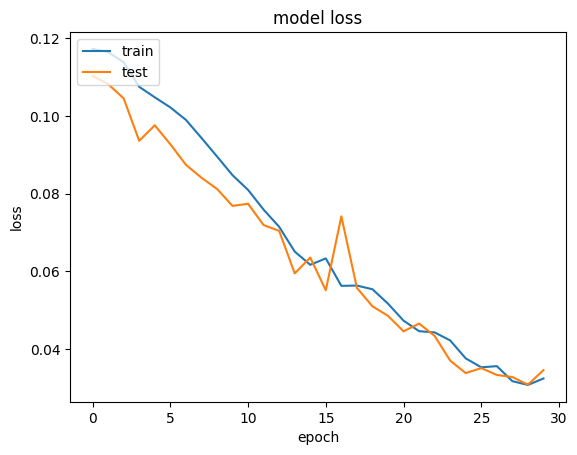

In [45]:
print ("Model fit")
# q_aware_model.reset_states()
history = q_aware_model.fit(x_train, y_train, batch_size=128,
                    epochs=30, validation_data=(x_test, y_test))

# Plot training and validation losses 
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
angle_thresh=10
# Helper functions for evaluating model accuracy

def get_action(angle_rad):
  degree = rad2deg(angle_rad)
  if degree < angle_thresh and degree > -angle_thresh:
    return "center"
  elif degree >= angle_thresh:
    return "right" 
  elif degree <-angle_thresh:
    return "left"

In [47]:
pred_angle = q_aware_model.predict(x_test)
pred = np.array(list(map(get_action, pred_angle)))
ground = np.array(list(map(get_action, y_test)))
print('Accuracy is %.3f' % np.mean(pred == ground))

22/22 [==============================] - 0s 11ms/step
Accuracy is 0.841


visualization

In [48]:
def plot_image(i, prediction_array, groundtrue_array, img_array):
  angle, predicted_label, groundtrue_label, img = int(rad2deg(pred_angle[i])), prediction_array[i], groundtrue_array[i], img_array[i]
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])
  img = np.squeeze(img)
  plt.imshow(img, cmap=plt.cm.binary)
  if predicted_label == groundtrue_label:
    color = 'green'
  else:
    color = 'red'  
  plt.xlabel("Predict:{} ({}) Actual:{}".format(predicted_label,angle,groundtrue_label), color=color)

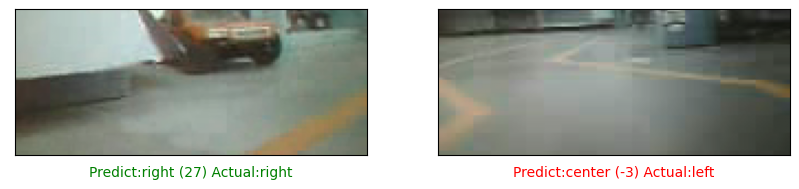

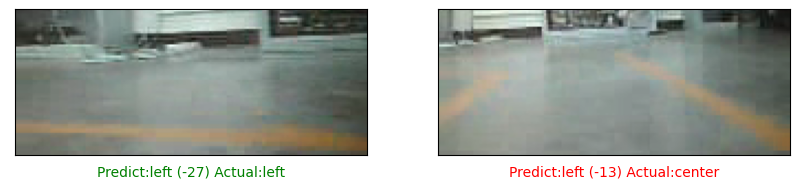

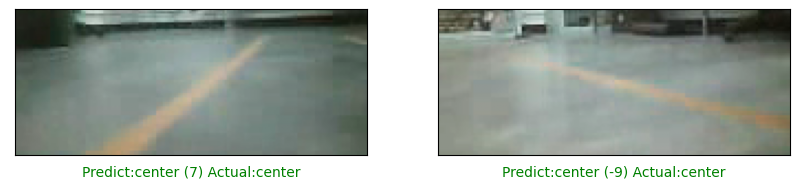

In [49]:
#@title Visualize the outputs { run: "auto" }
index = 200 #@param {type:"slider", min:0, max:244, step:6}
for i in range(3):
  plt.figure(figsize=(10,3))
  plt.subplot(1,2,1)
  plot_image(index + 2*i, pred, ground, x_test)
  plt.subplot(1,2,2)
  plot_image(index + 2*i+1, pred, ground, x_test)
  plt.show()

In [50]:
# Save both the Keras and TFLite models      
print("Model Save")                  
q_aware_model.save(model_file+".h5")

print("TFLite Model")
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

images = tf.cast(x_train, tf.float32)
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(images).batch(1).take(100):
    yield [input_value]

converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.int8  # or tf.uint8
# converter.inference_output_type = tf.int8  # or tf.uint8

quantized_tflite_model = converter.convert()

interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

with open(model_file+".tflite", 'wb') as f:
    f.write(quantized_tflite_model)

print (model_file+".tflite is saved. copy this file to the robot")

if RunningInCOLAB: 
    from google.colab import files
    files.download(model_file+".tflite")

Model Save
TFLite Model


/opt/homebrew/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /var/folders/2_/kskwshj16hqb0586p6cydg4h0000gq/T/tmpnbi5dkdy/assets


INFO:tensorflow:Assets written to: /var/folders/2_/kskwshj16hqb0586p6cydg4h0000gq/T/tmpnbi5dkdy/assets


input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>
models/opt-160x66x3.tflite is saved. copy this file to the robot


/opt/homebrew/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-07-21 10:45:48.610737: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-07-21 10:45:48.610751: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-07-21 10:45:48.610907: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/2_/kskwshj16hqb0586p6cydg4h0000gq/T/tmpnbi5dkdy
2023-07-21 10:45:48.614106: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-07-21 10:45:48.614112: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/2_/kskwshj16hqb0586p6cydg4h0000gq/T/tmpnbi5dkdy
2023-07-21 10:45:48.626151: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.

generate cc file from tflite model

In [51]:
!xxd -i {model_file}.tflite > {model_file}.cc
print (model_file+".cc is saved. copy this file to the robot")

models/opt-160x66x3.cc is saved. copy this file to the robot
